In [1]:
import numpy as np
import matplotlib.pyplot as plt
import CrossCorrelation as cc
from scipy.stats import chi2
import time

### Loading Data

In [2]:
ngrid = 80  # Number of grid points along each axis 
grid_cell_size = 2  # Grid cell size in cMpc/h
boxsize = ngrid * grid_cell_size  # Total box length in cMpc/h
boxsize = np.float32(boxsize)  # Convert integer to float32

z = 6
data_dir = 'GADGET-2_Runs/files_z006.00/'

# Load galaxy data
galaxy_data = np.load(data_dir + f'galaxies_z{z}.npz')

# Extract the stored arrays
positions = galaxy_data['positions']  # Shape (N,3)
muv = galaxy_data['muv']  # Shape (N,)

print(f"Loaded galaxy data for z={z}: positions shape {positions.shape}, muv shape {muv.shape}")

# Load field data
field_data = np.load(data_dir + f'fields_z{z}.npz')

# Extract the stored arrays
qion = field_data['qion']  # Shape (80,80,80)
del_m = field_data['del_m']  # Shape (80,80,80)
del_HI = field_data['del_HI']  # Shape (80,80,80)

print(f"Loaded field data for z={z}: qion shape {qion.shape}, del_m shape {del_m.shape}, del_HI shape {del_HI.shape}")

magnitude_min = -25
magnitude_max = -17
mask = (muv >= magnitude_min) & (muv <= magnitude_max)
pos = positions[mask]
pos = pos.astype(np.float32)  
print(f"We take all the {len(pos)} galaxies, and store their positions in an array of shape {np.shape(pos)}")

Loaded galaxy data for z=6: positions shape (1459007, 3), muv shape (1459007,)
Loaded field data for z=6: qion shape (80, 80, 80), del_m shape (80, 80, 80), del_HI shape (80, 80, 80)
We take all the 225425 galaxies, and store their positions in an array of shape (225425, 3)


### Setting up parameters

In [3]:
boxsize = 160 # Mpc/h
bin_len = 16

kNN = [1,2,3]
threshold = 90

n_data = 100
n_null = 1000

bins_knn = np.zeros((bin_len, 3))
bins_knn[:, 0] = np.linspace(3, 6.5, bin_len)
bins_knn[:, 1] = np.linspace(3, 7.0, bin_len)
bins_knn[:, 2] = np.linspace(3, 7.5, bin_len)

n_gal = 50000 # Change this to change number density of galaxies

### Computing kNN CDFs

In [4]:
start_time = time.time()

psi, psi_null = cc.Sampling_kNN_CC(bins_knn, boxsize, pos, del_HI, 
                                    matter_grid=80, query_type='grid', query_grid=100, 
                                   threshold=threshold, kNN=kNN, 
                                   n_gal=n_gal, n_data=n_data, n_null=n_null, n_threads=8)

end_time = time.time()
elapsed = end_time - start_time
print(f"Execution time: {elapsed//60:.0f} min {elapsed%60:.2f} sec")

Execution time: 33 min 7.64 sec


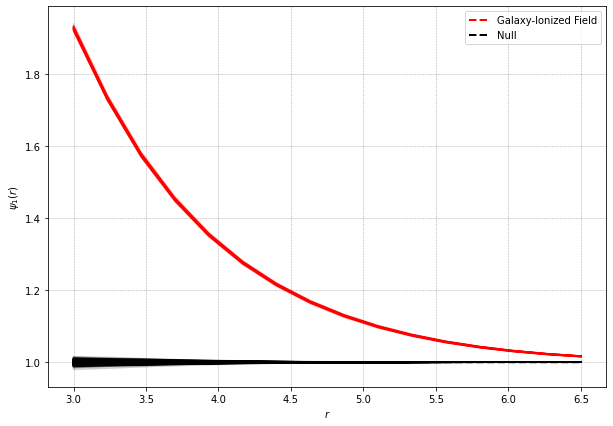

In [5]:
# Plotting for k=1
plt.figure(figsize=(10, 7))
for i in range(n_data):
    plt.plot(bins_knn[:, 0],psi[0,i],color='r',alpha=0.1)
for i in range(n_null):
    plt.plot(bins_knn[:, 0],psi_null[0,i],color='k',alpha=0.1)

plt.plot(bins_knn[:, 0], np.mean(psi[0], axis=0), color='r', ls='dashed',label='Galaxy-Ionized Field',lw=2) 
plt.plot(bins_knn[:, 0], np.mean(psi_null[0], axis=0), color='k', ls='dashed',label='Null',lw=2) 

plt.ylabel(r'$\psi_1(r)$')
plt.xlabel(r'$r$')
plt.legend()
plt.grid(True)  
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

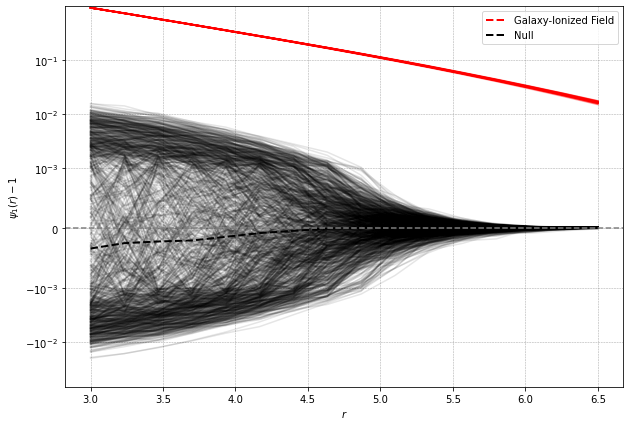

In [6]:
plt.figure(figsize=(10, 7))

# Individual runs, centered at y=1
for i in range(n_data):
    plt.plot(bins_knn[:, 0], psi[0, i] - 1, color='r', alpha=0.1)
for i in range(n_null):
    plt.plot(bins_knn[:, 0], psi_null[0, i] - 1, color='k', alpha=0.1)

# Mean curves, centered at y=1
plt.plot(bins_knn[:, 0], np.mean(psi[0], axis=0) - 1, color='r', ls='dashed',
         label='Galaxy-Ionized Field', lw=2)
plt.plot(bins_knn[:, 0], np.mean(psi_null[0], axis=0) - 1, color='k', ls='dashed',
         label='Null', lw=2)

# Now the "zero" line is the old y=1
plt.axhline(0, color='gray', linestyle='--')

# Zoomed scale
plt.yscale('symlog', linthresh=1e-3)  # sensitivity near 0 (old y=1)


plt.ylabel(r'$\psi_1(r) - 1$') 
plt.xlabel(r'$r$')
plt.legend()
plt.grid(True)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

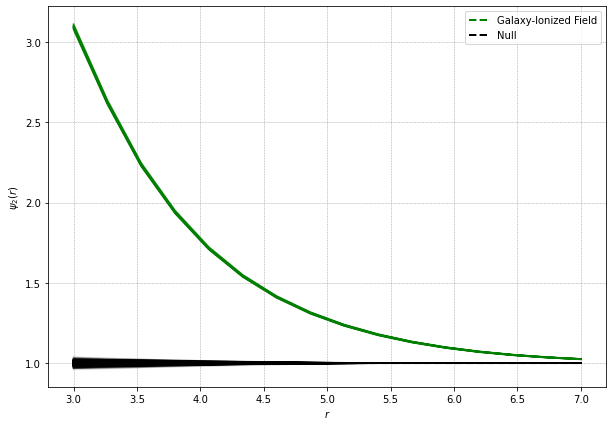

In [7]:
# Plotting for k=2
plt.figure(figsize=(10, 7))
for i in range(n_data):
    plt.plot(bins_knn[:, 1],psi[1,i],color='g',alpha=0.1)
for i in range(n_null):
    plt.plot(bins_knn[:, 1],psi_null[1,i],color='k',alpha=0.1)

plt.plot(bins_knn[:, 1], np.mean(psi[1], axis=0), color='g', ls='dashed',label='Galaxy-Ionized Field',lw=2) 
plt.plot(bins_knn[:, 1], np.mean(psi_null[1], axis=0), color='k', ls='dashed',label='Null',lw=2) 

plt.ylabel(r'$\psi_2(r)$')
plt.xlabel(r'$r$')
plt.legend()
plt.grid(True)  
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

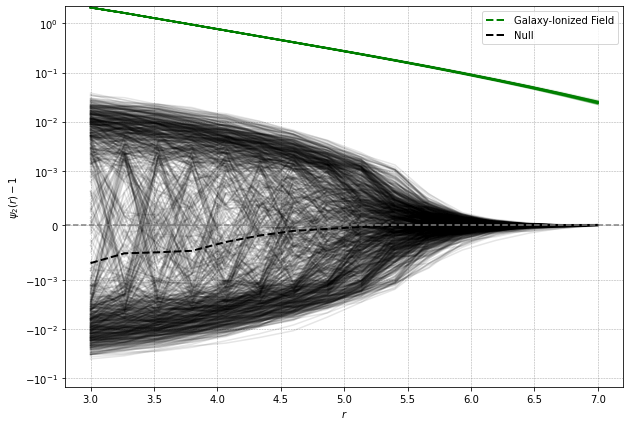

In [8]:
plt.figure(figsize=(10, 7))

# Individual runs, centered at y=1
for i in range(n_data):
    plt.plot(bins_knn[:, 1], psi[1, i] - 1, color='g', alpha=0.1)
for i in range(n_null):
    plt.plot(bins_knn[:, 1], psi_null[1, i] - 1, color='k', alpha=0.1)

# Mean curves, centered at y=1
plt.plot(bins_knn[:, 1], np.mean(psi[1], axis=0) - 1, color='g', ls='dashed',
         label='Galaxy-Ionized Field', lw=2)
plt.plot(bins_knn[:, 1], np.mean(psi_null[1], axis=0) - 1, color='k', ls='dashed',
         label='Null', lw=2)

# Now the "zero" line is the old y=1
plt.axhline(0, color='gray', linestyle='--')

# Zoomed scale
plt.yscale('symlog', linthresh=1e-3)  # sensitivity near 0 (old y=1)


plt.ylabel(r'$\psi_2(r) - 1$')  
plt.xlabel(r'$r$')
plt.legend()
plt.grid(True)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

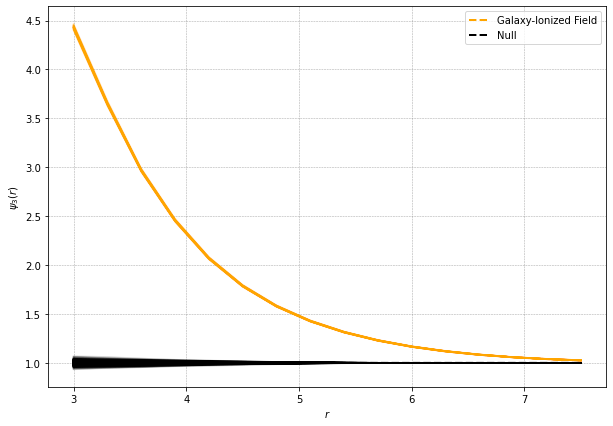

In [9]:
# Plotting for k=3
plt.figure(figsize=(10, 7))
for i in range(n_data):
    plt.plot(bins_knn[:, 2],psi[2,i],color='orange',alpha=0.1)
for i in range(n_null):
    plt.plot(bins_knn[:, 2],psi_null[2,i],color='k',alpha=0.1)

plt.plot(bins_knn[:, 2], np.mean(psi[2], axis=0), color='orange', ls='dashed',label='Galaxy-Ionized Field',lw=2) 
plt.plot(bins_knn[:, 2], np.mean(psi_null[2], axis=0), color='k', ls='dashed',label='Null',lw=2) 

plt.ylabel(r'$\psi_3(r)$')
plt.xlabel(r'$r$')
plt.legend()
plt.grid(True)  
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

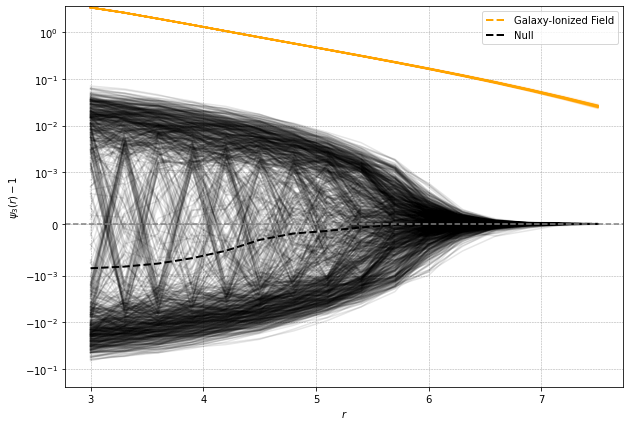

In [10]:
plt.figure(figsize=(10, 7))

# Individual runs, centered at y=1
for i in range(n_data):
    plt.plot(bins_knn[:, 2], psi[2, i] - 1, color='orange', alpha=0.1)
for i in range(n_null):
    plt.plot(bins_knn[:, 2], psi_null[2, i] - 1, color='k', alpha=0.1)

# Mean curves, centered at y=1
plt.plot(bins_knn[:, 2], np.mean(psi[2], axis=0) - 1, color='orange', ls='dashed',
         label='Galaxy-Ionized Field', lw=2)
plt.plot(bins_knn[:, 2], np.mean(psi_null[2], axis=0) - 1, color='k', ls='dashed',
         label='Null', lw=2)

# Now the "zero" line is the old y=1
plt.axhline(0, color='gray', linestyle='--')

# Zoomed scale
plt.yscale('symlog', linthresh=1e-3)  # sensitivity near 0 (old y=1)


plt.ylabel(r'$\psi_3(r) - 1$')  
plt.xlabel(r'$r$')
plt.legend()
plt.grid(True)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

### Chi square tests

In [11]:
null = psi_null[0]
cov_1nn = np.cov(null,rowvar=False,bias=True)
hartlap = (n_null-bin_len-2)/(n_null-1)
c_inv_1nn = hartlap*np.linalg.inv(cov_1nn)

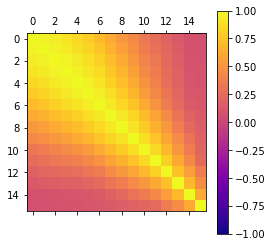

In [12]:
corr = np.corrcoef(null,rowvar=False)
plt.matshow(corr,vmax=1,vmin=-1,cmap='plasma')
plt.colorbar()

In [13]:
null = psi_null[1]
cov_2nn = np.cov(null,rowvar=False,bias=True)
hartlap = (n_null-bin_len-2)/(n_null-1)
c_inv_2nn = hartlap*np.linalg.inv(cov_2nn)

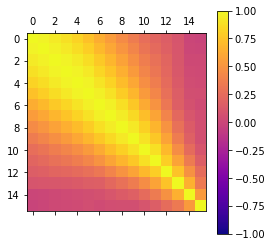

In [14]:
corr = np.corrcoef(null,rowvar=False)
plt.matshow(corr,vmax=1,vmin=-1,cmap='plasma')
plt.colorbar()

In [15]:
null = psi_null[2]
cov_3nn = np.cov(null,rowvar=False,bias=True)
hartlap = (n_null-bin_len-2)/(n_null-1)
c_inv_3nn = hartlap*np.linalg.inv(cov_3nn)

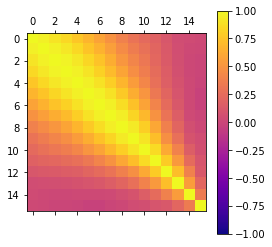

In [16]:
corr = np.corrcoef(null,rowvar=False)
plt.matshow(corr,vmax=1,vmin=-1,cmap='plasma')
plt.colorbar()

In [17]:
data_1nn = np.mean(psi[0], axis=0)
data_2nn = np.mean(psi[1], axis=0)
data_3nn = np.mean(psi[2], axis=0)

null_1nn = np.mean(psi_null[0], axis=0)
null_2nn = np.mean(psi_null[1], axis=0)
null_3nn = np.mean(psi_null[2], axis=0)

chi_sq_1nn = (np.transpose(data_1nn - null_1nn)).dot(c_inv_1nn).dot(data_1nn - null_1nn)
chi_sq_2nn = (np.transpose(data_2nn - null_2nn)).dot(c_inv_2nn).dot(data_2nn - null_2nn)
chi_sq_3nn = (np.transpose(data_3nn - null_3nn)).dot(c_inv_3nn).dot(data_3nn - null_3nn)

chi_sq_1nn_null = np.zeros(n_null)
chi_sq_2nn_null = np.zeros(n_null)
chi_sq_3nn_null = np.zeros(n_null)

for i in range(n_null):
    chi_sq_1nn_null[i] = (np.transpose(psi_null[0,i] - null_1nn)).dot(c_inv_1nn).dot(psi_null[0,i] - null_1nn)
    chi_sq_2nn_null[i] = (np.transpose(psi_null[1,i] - null_2nn)).dot(c_inv_2nn).dot(psi_null[1,i] - null_2nn)
    chi_sq_3nn_null[i] = (np.transpose(psi_null[2,i] - null_3nn)).dot(c_inv_3nn).dot(psi_null[2,i] - null_3nn)

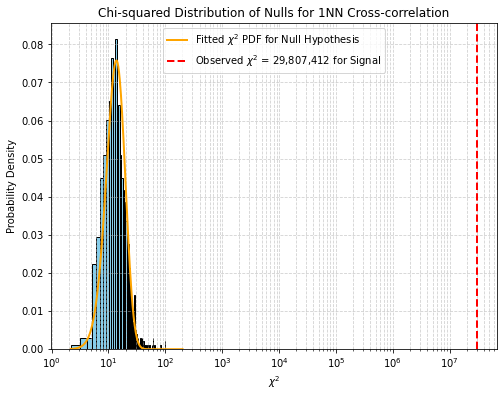

In [18]:
plt.figure(figsize=(8, 6))

# Fit chi-squared distribution with fixed dof & loc
dof = bin_len
_, loc_fit, scale_fit = chi2.fit(chi_sq_1nn_null, floc=0, f0=dof)

# Histogram of null χ² values
plt.hist(chi_sq_1nn_null, bins=100, color='skyblue', edgecolor='black', density=True)

# Fitted chi-squared PDF (log-spaced for log x-axis)
x_vals = np.logspace(np.log10(min(chi_sq_1nn_null)), 
                     np.log10(max(chi_sq_1nn_null) * 2), 300)
plt.plot(x_vals, chi2.pdf(x_vals, dof, loc=loc_fit, scale=scale_fit),
         color='orange', lw=2, label='Fitted $\chi^2$ PDF for Null Hypothesis')

# Vertical line for observed value
plt.axvline(chi_sq_1nn, color='red', linestyle='--', linewidth=2,
            label=f'Observed $\chi^2$ = {chi_sq_1nn:,.0f} for Signal')

plt.xscale('log')
plt.xlabel(r'$\chi^2$')
plt.ylabel('Probability Density')
plt.title('Chi-squared Distribution of Nulls for 1NN Cross-correlation')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.6)

plt.show()

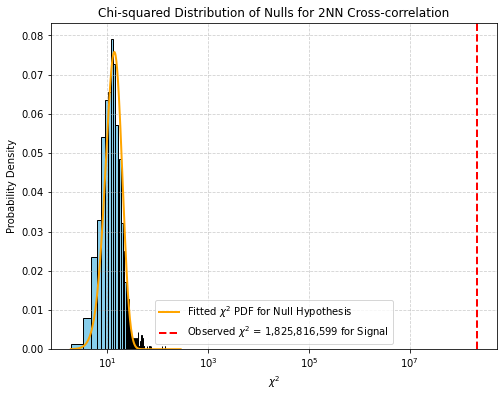

In [19]:
plt.figure(figsize=(8, 6))

# Fit chi-squared distribution with fixed dof & loc
dof = bin_len
_, loc_fit, scale_fit = chi2.fit(chi_sq_2nn_null, floc=0, f0=dof)

# Histogram of null χ² values
plt.hist(chi_sq_2nn_null, bins=100, color='skyblue', edgecolor='black', density=True)

# Fitted chi-squared PDF (log-spaced for log x-axis)
x_vals = np.logspace(np.log10(min(chi_sq_2nn_null)), 
                     np.log10(max(chi_sq_2nn_null) * 2), 300)
plt.plot(x_vals, chi2.pdf(x_vals, dof, loc=loc_fit, scale=scale_fit),
         color='orange', lw=2, label='Fitted $\chi^2$ PDF for Null Hypothesis')

# Vertical line for observed value
plt.axvline(chi_sq_2nn, color='red', linestyle='--', linewidth=2,
            label=f'Observed $\chi^2$ = {chi_sq_3nn:,.0f} for Signal')

plt.xscale('log')
plt.xlabel(r'$\chi^2$')
plt.ylabel('Probability Density')
plt.title('Chi-squared Distribution of Nulls for 2NN Cross-correlation')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.6)

plt.show()

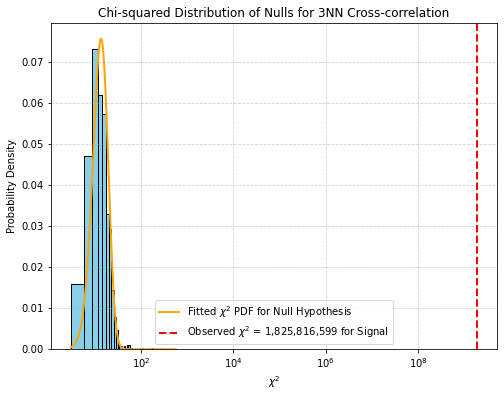

In [20]:
plt.figure(figsize=(8, 6))

# Fit chi-squared distribution with fixed dof & loc
dof = bin_len
_, loc_fit, scale_fit = chi2.fit(chi_sq_3nn_null, floc=0, f0=dof)

# Histogram of null χ² values
plt.hist(chi_sq_3nn_null, bins=100, color='skyblue', edgecolor='black', density=True)

# Fitted chi-squared PDF (log-spaced for log x-axis)
x_vals = np.logspace(np.log10(min(chi_sq_3nn_null)), 
                     np.log10(max(chi_sq_3nn_null) * 2), 300)
plt.plot(x_vals, chi2.pdf(x_vals, dof, loc=loc_fit, scale=scale_fit),
         color='orange', lw=2, label='Fitted $\chi^2$ PDF for Null Hypothesis')

# Vertical line for observed value
plt.axvline(chi_sq_3nn, color='red', linestyle='--', linewidth=2,
            label=f'Observed $\chi^2$ = {chi_sq_3nn:,.0f} for Signal')

plt.xscale('log')
plt.xlabel(r'$\chi^2$')
plt.ylabel('Probability Density')
plt.title('Chi-squared Distribution of Nulls for 3NN Cross-correlation')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.6)

plt.show()